In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
PROJECT_DIR = '/sc/arion/projects/CommonMind/collin'
os.chdir(PROJECT_DIR)


In [3]:
# Step 1: Load expression and normalize
NPS_AD_FNAME = '/sc/arion/projects/psychAD/NPS-AD/freeze2_proc/240124_PsychAD_freeze3_FULL_clean.h5ad'
adata=sc.read_h5ad(NPS_AD_FNAME)
print(adata.shape)

#filter for protein coding
gene_annot = pd.read_csv('/sc/arion/projects/psychAD/NPS-AD/freeze2_rc/h5ad_final/gene_annotation.tsv', sep='\t')
protein_coding = gene_annot[gene_annot['gene_type'] == 'protein_coding']
protein_coding_genes = protein_coding['gene_name'].tolist()

#filter for protein coding
adata = adata[:, adata.var.index.isin(protein_coding_genes)]
#NPS_AD.write_h5ad('/sc/arion/projects/CommonMind/collin/PsychAD/data/h5ad/PsychAD_GRN_freeze3_proteincoding.h5ad')
print(adata.shape)


(6320459, 34890)
(6320459, 17259)


In [2]:
#pull only age filter
adata=sc.read_h5ad('/sc/arion/projects/CommonMind/collin/PsychAD/data/h5ad/PsychAD_GRN_freeze3_proteincoding_age_filter.h5ad')
adata


In [4]:
# Step 2: Apply standard filters

# Filter cells and genes
sc.pp.filter_cells(adata, min_genes=200 )
sc.pp.filter_genes(adata, min_cells=10)
print(adata.shape)


# Filter cells based on mitochondrial genes
adata = adata[adata.obs['n_genes'] < 6000, :]
print(adata.shape)
adata = adata[adata.obs['percent_mito'] < 0.15, :]
print(adata.shape)

# Filter for age 
adata = adata[adata.obs['Age'] > 65, :]
print(adata.shape)


# Filter for BB
adata = adata[adata.obs['Source'].isin(['R', 'M'])]
print(adata.shape)



adata.write_h5ad('/sc/arion/projects/CommonMind/collin/PsychAD/data/h5ad/reprocessed_2024/PsychAD_GRN_freeze3_Step_2_filtered.h5ad')

In [ ]:
# Step 3: Add in metadata for contrasts 

adata.obs['barcodekey'] = adata.obs.index
adata.obs

metadata = pd.read_csv('/sc/arion/projects/CommonMind/collin/PsychAD/data/obs_meta/clinical_metadata_metacontrast.csv')
metadata = pd.merge(metadata, adata.obs, on='SubID')
metadata

adata.obs = metadata
adata.obs

adata.obs.set_index('barcodekey', inplace=True)
adata.write_h5ad('/sc/arion/projects/CommonMind/collin/PsychAD/data/h5ad/PsychAD_GRN_freeze3_transformed.h5ad')
adata

In [26]:
#load filtered anndata object

adata=sc.read_h5ad('/sc/arion/projects/CommonMind/collin/PsychAD/data/h5ad/PsychAD_GRN_freeze3_transformed.h5ad')
#print(np.max(adata.X))
print(adata)
print(np.max(adata.X))
print(np.max(adata.raw.X))


AnnData object with n_obs × n_vars = 2127014 × 17259
    obs: 'SubID', 'Age', 'Brain_bank', 'Sex', 'c02x', 'c03x', 'c28x', 'c29x', 'c31x', 'c32x', 'c51x', 'c52x', 'c54x', 'c55x', 'r05x', 'r06x', 'r01x', 'r02x', 'r03x', 'r04x', 'r07x', 'r08x', 'r09x', 'm01x', 'm02x', 'm09x', 'm13x', 'm14x', 'm17x', 'm18x', 'm19x', 'm20x', 'm21x', 'Channel', 'rep', 'poolID', 'round_num', 'prep', 'SubID_cs', 'HTO_n_cs', 'max_prob', 'doublet_prob', 'Source', 'n_genes', 'n_counts', 'percent_mito', 'passed_SubID', 'scale', 'G1/S', 'G2/M', 'cycle_diff', 'cycling', 'predicted_phase', 'female_score', 'male_score', 'gender_score', 'predicted_gender', 'mito_genes', 'mito_ribo', 'ribo_genes', 'apoptosis', 'leiden_labels_res30', 'doublet_score', 'pred_dbl', 'class', 'subclass', 'subtype', 'Astro', 'EN_L2_3_IT', 'EN_L3_5_IT_1', 'EN_L3_5_IT_2', 'EN_L3_5_IT_3', 'EN_L5_6_NP', 'EN_L5_ET', 'EN_L6B', 'EN_L6_CT', 'EN_L6_IT_1', 'EN_L6_IT_2', 'Endo', 'IN_ADARB2', 'IN_LAMP5_LHX6', 'IN_LAMP5_RELN', 'IN_PVALB', 'IN_PVALB_CHC', 

In [27]:
#Step 4: Add obs and var to raw adata

# save a copy of the raw data
raw_ad = adata.raw.to_adata()
raw_ad

#pull var from original dataframe and add to raw
raw_ad_var = pd.read_csv('/sc/arion/projects/CommonMind/collin/PsychAD/data/obs_meta/var_df.csv')
raw_ad.var = raw_ad_var
raw_ad.var.set_index('featurekey', inplace=True)


raw_ad.var

# save a copy of the raw data
#filter for protein coding
gene_annot = pd.read_csv('/sc/arion/projects/psychAD/NPS-AD/freeze2_rc/h5ad_final/gene_annotation.tsv', sep='\t')
protein_coding = gene_annot[gene_annot['gene_type'] == 'protein_coding']
protein_coding_genes = protein_coding['gene_name'].tolist()


#filter for mito
#raw_ad = raw_ad[raw_ad.obs['percent_mito'] < 0.1, :]

#filter for protein coding
raw_ad = raw_ad[:, raw_ad.var.index.isin(protein_coding_genes)]



#raw_ad.write_h5ad('/sc/arion/projects/CommonMind/collin/PsychAD/data/h5ad/PsychAD_GRN_freeze3_preprocessed_nomito_raw.h5ad')
print(np.max(raw_ad.X))
raw_ad



2821.0


View of AnnData object with n_obs × n_vars = 2127014 × 17259
    obs: 'SubID', 'Age', 'Brain_bank', 'Sex', 'c02x', 'c03x', 'c28x', 'c29x', 'c31x', 'c32x', 'c51x', 'c52x', 'c54x', 'c55x', 'r05x', 'r06x', 'r01x', 'r02x', 'r03x', 'r04x', 'r07x', 'r08x', 'r09x', 'm01x', 'm02x', 'm09x', 'm13x', 'm14x', 'm17x', 'm18x', 'm19x', 'm20x', 'm21x', 'Channel', 'rep', 'poolID', 'round_num', 'prep', 'SubID_cs', 'HTO_n_cs', 'max_prob', 'doublet_prob', 'Source', 'n_genes', 'n_counts', 'percent_mito', 'passed_SubID', 'scale', 'G1/S', 'G2/M', 'cycle_diff', 'cycling', 'predicted_phase', 'female_score', 'male_score', 'gender_score', 'predicted_gender', 'mito_genes', 'mito_ribo', 'ribo_genes', 'apoptosis', 'leiden_labels_res30', 'doublet_score', 'pred_dbl', 'class', 'subclass', 'subtype', 'Astro', 'EN_L2_3_IT', 'EN_L3_5_IT_1', 'EN_L3_5_IT_2', 'EN_L3_5_IT_3', 'EN_L5_6_NP', 'EN_L5_ET', 'EN_L6B', 'EN_L6_CT', 'EN_L6_IT_1', 'EN_L6_IT_2', 'Endo', 'IN_ADARB2', 'IN_LAMP5_LHX6', 'IN_LAMP5_RELN', 'IN_PVALB', 'IN_PVAL

In [15]:
#raw_ad = raw_ad[:, raw_ad.var['highly_variable_features']]
print(np.max(raw_ad.X))
raw_ad

2071.0


View of AnnData object with n_obs × n_vars = 2127014 × 6000
    obs: 'SubID', 'Age', 'Brain_bank', 'Sex', 'c02x', 'c03x', 'c28x', 'c29x', 'c31x', 'c32x', 'c51x', 'c52x', 'c54x', 'c55x', 'r05x', 'r06x', 'r01x', 'r02x', 'r03x', 'r04x', 'r07x', 'r08x', 'r09x', 'm01x', 'm02x', 'm09x', 'm13x', 'm14x', 'm17x', 'm18x', 'm19x', 'm20x', 'm21x', 'Channel', 'rep', 'poolID', 'round_num', 'prep', 'SubID_cs', 'HTO_n_cs', 'max_prob', 'doublet_prob', 'Source', 'n_genes', 'n_counts', 'percent_mito', 'passed_SubID', 'scale', 'G1/S', 'G2/M', 'cycle_diff', 'cycling', 'predicted_phase', 'female_score', 'male_score', 'gender_score', 'predicted_gender', 'mito_genes', 'mito_ribo', 'ribo_genes', 'apoptosis', 'leiden_labels_res30', 'doublet_score', 'pred_dbl', 'class', 'subclass', 'subtype', 'Astro', 'EN_L2_3_IT', 'EN_L3_5_IT_1', 'EN_L3_5_IT_2', 'EN_L3_5_IT_3', 'EN_L5_6_NP', 'EN_L5_ET', 'EN_L6B', 'EN_L6_CT', 'EN_L6_IT_1', 'EN_L6_IT_2', 'Endo', 'IN_ADARB2', 'IN_LAMP5_LHX6', 'IN_LAMP5_RELN', 'IN_PVALB', 'IN_PVALB

In [28]:
raw_ad.write_h5ad('/sc/arion/projects/CommonMind/collin/PsychAD/data/h5ad/reprocessed_2024/PsychAD_GRN_reprocessed_raw.h5ad')

/sc/arion/projects/roussp01a/collin/envs/scenicplus2/lib/python3.8/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


/sc/arion/projects/roussp01a/collin/envs/scenicplus2/lib/python3.8/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/sc/arion/projects/roussp01a/collin/envs/scenicplus2/lib/python3.8/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


In [29]:
#perform normalization and scaling
#calculate HVGs

# Total-count normalize (library-size correct) to 10,000 reads/cell
sc.pp.normalize_per_cell(raw_ad)

# log transform the data.
sc.pp.log1p(raw_ad)

# keep only highly variable genes defined by DH 
#raw_ad = raw_ad[:, raw_ad.var['highly_variable_features']]

# regress out total counts per cell and the percentage of mitochondrial genes expressed
#sc.pp.regress_out(raw_ad, ['n_counts', 'percent_mito'] ) #, n_jobs=args.threads)

# scale each gene to unit variance, clip values exceeding SD 10.
sc.pp.scale(raw_ad, max_value=10)

print(np.max(raw_ad.X))

raw_ad


10.0


AnnData object with n_obs × n_vars = 2127014 × 17259
    obs: 'SubID', 'Age', 'Brain_bank', 'Sex', 'c02x', 'c03x', 'c28x', 'c29x', 'c31x', 'c32x', 'c51x', 'c52x', 'c54x', 'c55x', 'r05x', 'r06x', 'r01x', 'r02x', 'r03x', 'r04x', 'r07x', 'r08x', 'r09x', 'm01x', 'm02x', 'm09x', 'm13x', 'm14x', 'm17x', 'm18x', 'm19x', 'm20x', 'm21x', 'Channel', 'rep', 'poolID', 'round_num', 'prep', 'SubID_cs', 'HTO_n_cs', 'max_prob', 'doublet_prob', 'Source', 'n_genes', 'n_counts', 'percent_mito', 'passed_SubID', 'scale', 'G1/S', 'G2/M', 'cycle_diff', 'cycling', 'predicted_phase', 'female_score', 'male_score', 'gender_score', 'predicted_gender', 'mito_genes', 'mito_ribo', 'ribo_genes', 'apoptosis', 'leiden_labels_res30', 'doublet_score', 'pred_dbl', 'class', 'subclass', 'subtype', 'Astro', 'EN_L2_3_IT', 'EN_L3_5_IT_1', 'EN_L3_5_IT_2', 'EN_L3_5_IT_3', 'EN_L5_6_NP', 'EN_L5_ET', 'EN_L6B', 'EN_L6_CT', 'EN_L6_IT_1', 'EN_L6_IT_2', 'Endo', 'IN_ADARB2', 'IN_LAMP5_LHX6', 'IN_LAMP5_RELN', 'IN_PVALB', 'IN_PVALB_CHC', 

In [30]:
raw_ad

AnnData object with n_obs × n_vars = 2127014 × 17259
    obs: 'SubID', 'Age', 'Brain_bank', 'Sex', 'c02x', 'c03x', 'c28x', 'c29x', 'c31x', 'c32x', 'c51x', 'c52x', 'c54x', 'c55x', 'r05x', 'r06x', 'r01x', 'r02x', 'r03x', 'r04x', 'r07x', 'r08x', 'r09x', 'm01x', 'm02x', 'm09x', 'm13x', 'm14x', 'm17x', 'm18x', 'm19x', 'm20x', 'm21x', 'Channel', 'rep', 'poolID', 'round_num', 'prep', 'SubID_cs', 'HTO_n_cs', 'max_prob', 'doublet_prob', 'Source', 'n_genes', 'n_counts', 'percent_mito', 'passed_SubID', 'scale', 'G1/S', 'G2/M', 'cycle_diff', 'cycling', 'predicted_phase', 'female_score', 'male_score', 'gender_score', 'predicted_gender', 'mito_genes', 'mito_ribo', 'ribo_genes', 'apoptosis', 'leiden_labels_res30', 'doublet_score', 'pred_dbl', 'class', 'subclass', 'subtype', 'Astro', 'EN_L2_3_IT', 'EN_L3_5_IT_1', 'EN_L3_5_IT_2', 'EN_L3_5_IT_3', 'EN_L5_6_NP', 'EN_L5_ET', 'EN_L6B', 'EN_L6_CT', 'EN_L6_IT_1', 'EN_L6_IT_2', 'Endo', 'IN_ADARB2', 'IN_LAMP5_LHX6', 'IN_LAMP5_RELN', 'IN_PVALB', 'IN_PVALB_CHC', 

In [31]:
raw_ad.write_h5ad('/sc/arion/projects/CommonMind/collin/PsychAD/data/h5ad/reprocessed_2024/PsychAD_GRN_reprocessed_transformed.h5ad')

In [32]:
print("yay done")

yay done


In [34]:
del adata 
del raw_ad


In [33]:
raw_ad

AnnData object with n_obs × n_vars = 2127014 × 17259
    obs: 'SubID', 'Age', 'Brain_bank', 'Sex', 'c02x', 'c03x', 'c28x', 'c29x', 'c31x', 'c32x', 'c51x', 'c52x', 'c54x', 'c55x', 'r05x', 'r06x', 'r01x', 'r02x', 'r03x', 'r04x', 'r07x', 'r08x', 'r09x', 'm01x', 'm02x', 'm09x', 'm13x', 'm14x', 'm17x', 'm18x', 'm19x', 'm20x', 'm21x', 'Channel', 'rep', 'poolID', 'round_num', 'prep', 'SubID_cs', 'HTO_n_cs', 'max_prob', 'doublet_prob', 'Source', 'n_genes', 'n_counts', 'percent_mito', 'passed_SubID', 'scale', 'G1/S', 'G2/M', 'cycle_diff', 'cycling', 'predicted_phase', 'female_score', 'male_score', 'gender_score', 'predicted_gender', 'mito_genes', 'mito_ribo', 'ribo_genes', 'apoptosis', 'leiden_labels_res30', 'doublet_score', 'pred_dbl', 'class', 'subclass', 'subtype', 'Astro', 'EN_L2_3_IT', 'EN_L3_5_IT_1', 'EN_L3_5_IT_2', 'EN_L3_5_IT_3', 'EN_L5_6_NP', 'EN_L5_ET', 'EN_L6B', 'EN_L6_CT', 'EN_L6_IT_1', 'EN_L6_IT_2', 'Endo', 'IN_ADARB2', 'IN_LAMP5_LHX6', 'IN_LAMP5_RELN', 'IN_PVALB', 'IN_PVALB_CHC', 

# Highly Variable Genes

In [45]:
#load filtered anndata object

adata=sc.read_h5ad('/sc/arion/projects/CommonMind/collin/PsychAD/data/h5ad/PsychAD_GRN_freeze3_transformed.h5ad')
#print(np.max(adata.X))
print(adata)
print(np.max(adata.X))
print(np.max(adata.raw.X))


AnnData object with n_obs × n_vars = 2127014 × 17259
    obs: 'SubID', 'Age', 'Brain_bank', 'Sex', 'c02x', 'c03x', 'c28x', 'c29x', 'c31x', 'c32x', 'c51x', 'c52x', 'c54x', 'c55x', 'r05x', 'r06x', 'r01x', 'r02x', 'r03x', 'r04x', 'r07x', 'r08x', 'r09x', 'm01x', 'm02x', 'm09x', 'm13x', 'm14x', 'm17x', 'm18x', 'm19x', 'm20x', 'm21x', 'Channel', 'rep', 'poolID', 'round_num', 'prep', 'SubID_cs', 'HTO_n_cs', 'max_prob', 'doublet_prob', 'Source', 'n_genes', 'n_counts', 'percent_mito', 'passed_SubID', 'scale', 'G1/S', 'G2/M', 'cycle_diff', 'cycling', 'predicted_phase', 'female_score', 'male_score', 'gender_score', 'predicted_gender', 'mito_genes', 'mito_ribo', 'ribo_genes', 'apoptosis', 'leiden_labels_res30', 'doublet_score', 'pred_dbl', 'class', 'subclass', 'subtype', 'Astro', 'EN_L2_3_IT', 'EN_L3_5_IT_1', 'EN_L3_5_IT_2', 'EN_L3_5_IT_3', 'EN_L5_6_NP', 'EN_L5_ET', 'EN_L6B', 'EN_L6_CT', 'EN_L6_IT_1', 'EN_L6_IT_2', 'Endo', 'IN_ADARB2', 'IN_LAMP5_LHX6', 'IN_LAMP5_RELN', 'IN_PVALB', 'IN_PVALB_CHC', 

In [46]:
#Step 4: Add obs and var to raw adata

# save a copy of the raw data
raw_ad = adata.raw.to_adata()
raw_ad

#pull var from original dataframe and add to raw
raw_ad_var = pd.read_csv('/sc/arion/projects/CommonMind/collin/PsychAD/data/obs_meta/var_df.csv')
raw_ad.var = raw_ad_var
raw_ad.var.set_index('featurekey', inplace=True)


raw_ad.var

# save a copy of the raw data
#filter for protein coding
gene_annot = pd.read_csv('/sc/arion/projects/psychAD/NPS-AD/freeze2_rc/h5ad_final/gene_annotation.tsv', sep='\t')
protein_coding = gene_annot[gene_annot['gene_type'] == 'protein_coding']
protein_coding_genes = protein_coding['gene_name'].tolist()


#filter for mito
#raw_ad = raw_ad[raw_ad.obs['percent_mito'] < 0.1, :]

#filter for protein coding
raw_ad = raw_ad[:, raw_ad.var.index.isin(protein_coding_genes)]



#raw_ad.write_h5ad('/sc/arion/projects/CommonMind/collin/PsychAD/data/h5ad/PsychAD_GRN_freeze3_preprocessed_nomito_raw.h5ad')
print(np.max(raw_ad.X))
raw_ad



2821.0


View of AnnData object with n_obs × n_vars = 2127014 × 17259
    obs: 'SubID', 'Age', 'Brain_bank', 'Sex', 'c02x', 'c03x', 'c28x', 'c29x', 'c31x', 'c32x', 'c51x', 'c52x', 'c54x', 'c55x', 'r05x', 'r06x', 'r01x', 'r02x', 'r03x', 'r04x', 'r07x', 'r08x', 'r09x', 'm01x', 'm02x', 'm09x', 'm13x', 'm14x', 'm17x', 'm18x', 'm19x', 'm20x', 'm21x', 'Channel', 'rep', 'poolID', 'round_num', 'prep', 'SubID_cs', 'HTO_n_cs', 'max_prob', 'doublet_prob', 'Source', 'n_genes', 'n_counts', 'percent_mito', 'passed_SubID', 'scale', 'G1/S', 'G2/M', 'cycle_diff', 'cycling', 'predicted_phase', 'female_score', 'male_score', 'gender_score', 'predicted_gender', 'mito_genes', 'mito_ribo', 'ribo_genes', 'apoptosis', 'leiden_labels_res30', 'doublet_score', 'pred_dbl', 'class', 'subclass', 'subtype', 'Astro', 'EN_L2_3_IT', 'EN_L3_5_IT_1', 'EN_L3_5_IT_2', 'EN_L3_5_IT_3', 'EN_L5_6_NP', 'EN_L5_ET', 'EN_L6B', 'EN_L6_CT', 'EN_L6_IT_1', 'EN_L6_IT_2', 'Endo', 'IN_ADARB2', 'IN_LAMP5_LHX6', 'IN_LAMP5_RELN', 'IN_PVALB', 'IN_PVAL

In [47]:
#drop EN_L5_ET and Mural 
raw_ad = raw_ad[~raw_ad.obs['subclass'].isin(['EN_L5_ET', 'Mural', 'Adaptive'])]
print(raw_ad)

#keep only m01x
raw_ad = raw_ad[raw_ad.obs['m01x'].isin(['AD', 'Control'])]
print(raw_ad)

View of AnnData object with n_obs × n_vars = 2125674 × 17259
    obs: 'SubID', 'Age', 'Brain_bank', 'Sex', 'c02x', 'c03x', 'c28x', 'c29x', 'c31x', 'c32x', 'c51x', 'c52x', 'c54x', 'c55x', 'r05x', 'r06x', 'r01x', 'r02x', 'r03x', 'r04x', 'r07x', 'r08x', 'r09x', 'm01x', 'm02x', 'm09x', 'm13x', 'm14x', 'm17x', 'm18x', 'm19x', 'm20x', 'm21x', 'Channel', 'rep', 'poolID', 'round_num', 'prep', 'SubID_cs', 'HTO_n_cs', 'max_prob', 'doublet_prob', 'Source', 'n_genes', 'n_counts', 'percent_mito', 'passed_SubID', 'scale', 'G1/S', 'G2/M', 'cycle_diff', 'cycling', 'predicted_phase', 'female_score', 'male_score', 'gender_score', 'predicted_gender', 'mito_genes', 'mito_ribo', 'ribo_genes', 'apoptosis', 'leiden_labels_res30', 'doublet_score', 'pred_dbl', 'class', 'subclass', 'subtype', 'Astro', 'EN_L2_3_IT', 'EN_L3_5_IT_1', 'EN_L3_5_IT_2', 'EN_L3_5_IT_3', 'EN_L5_6_NP', 'EN_L5_ET', 'EN_L6B', 'EN_L6_CT', 'EN_L6_IT_1', 'EN_L6_IT_2', 'Endo', 'IN_ADARB2', 'IN_LAMP5_LHX6', 'IN_LAMP5_RELN', 'IN_PVALB', 'IN_PVAL

In [49]:
raw_ad.obs['Brain_bank']

barcodekey
M10031-1-AACAAGAAGGTCTTTG-0       MSSM
M10031-1-AACAAGACAACGCCCA-0       MSSM
M10031-1-AACCAACAGAACTCCT-0       MSSM
M10031-1-AACCAACTCGCGTTTC-0       MSSM
M10031-1-AAGCGTTGTAATGATG-0       MSSM
                                  ... 
R99126836-2-TTTGATCGTCAAGTTC-1    RUSH
R99126836-2-TTTGGAGGTGTCCGGT-1    RUSH
R99126836-2-TTTGGTTGTTACGTAC-1    RUSH
R99126836-2-TTTGGTTGTTTACTTC-1    RUSH
R99126836-2-TTTGTTGGTACTCGAT-1    RUSH
Name: Brain_bank, Length: 907948, dtype: category
Categories (2, object): ['MSSM', 'RUSH']

In [50]:
#
raw_ad.var['highly_variable_features_DH'] = raw_ad.var['highly_variable_features']
raw_ad.var = raw_ad.var[~raw_ad.var['highly_variable_features']]

raw_ad

/tmp/ipykernel_68880/2477562976.py:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  raw_ad.var['highly_variable_features_DH'] = raw_ad.var['highly_variable_features']


ValueError: Length of passed value for var_names is 11260, but this AnnData has shape: (907948, 17259)

In [59]:
raw_ad.var = raw_ad.var.drop('highly_variable_features', axis=1)
raw_ad.var

,gene_id,gene_name,gene_type,gene_chrom,gene_start,gene_end,n_cells,percent_cells,robust,ribosomal,mitochondrial,protein_coding,mitocarta_genes,robust_protein_coding,mean,bins,highly_variable_features_DH
featurekey,,,,,,,,,,,,,,,,,
TSPAN6,ENSG00000000003,TSPAN6,protein_coding,X,100627108,100639991,256237,2.879398,True,False,False,True,False,True,0.064755,"(0.0577, 0.0671]",False
TNMD,ENSG00000000005,TNMD,protein_coding,X,100584936,100599885,21369,0.240129,True,False,False,True,False,True,0.004788,"(0.00437, 0.00507]",False
DPM1,ENSG00000000419,DPM1,protein_coding,20,50934867,50959140,3001206,33.725288,True,False,False,True,False,True,0.791698,"(0.72, 0.825]",False
SCYL3,ENSG00000000457,SCYL3,protein_coding,1,169849631,169894267,1941205,21.813797,True,False,False,True,False,True,0.483067,"(0.425, 0.484]",False
C1orf112,ENSG00000000460,C1orf112,protein_coding,1,169662007,169854080,1798664,20.212029,True,False,False,True,False,True,0.478100,"(0.425, 0.484]",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NPBWR1,ENSG00000288611,NPBWR1,protein_coding,8,52939182,52943734,72057,0.809722,True,False,False,True,False,True,0.014720,"(0.0146, 0.017]",False
PDCD6-AHRR,ENSG00000288622,PDCD6-AHRR,protein_coding,5,271670,438291,32722,0.367705,True,False,False,True,False,True,0.006695,"(0.00593, 0.00688]",False
ENSG00000288637,ENSG00000288637,ENSG00000288637,protein_coding,4,153152435,153415081,170740,1.918647,True,False,False,True,False,True,0.040569,"(0.0362, 0.0422]",True


In [73]:
#perform normalization and scaling
#calculate HVGs

# Total-count normalize (library-size correct) to 10,000 reads/cell
sc.pp.normalize_per_cell(raw_ad)

# log transform the data.
sc.pp.log1p(raw_ad)

# keep only highly variable genes
sc.pp.highly_variable_genes(raw_ad, batch_key="Brain_bank")

raw_ad = raw_ad[:, raw_ad.var['highly_variable']]

# regress out total counts per cell and the percentage of mitochondrial genes expressed
#sc.pp.regress_out(raw_ad, ['n_counts', 'percent_mito'] ) #, n_jobs=args.threads)

# scale each gene to unit variance, clip values exceeding SD 10.
#sc.pp.scale(raw_ad, max_value=10)

print(np.max(raw_ad.X))

raw_ad


7.094322


View of AnnData object with n_obs × n_vars = 907948 × 2586
    obs: 'SubID', 'Age', 'Brain_bank', 'Sex', 'c02x', 'c03x', 'c28x', 'c29x', 'c31x', 'c32x', 'c51x', 'c52x', 'c54x', 'c55x', 'r05x', 'r06x', 'r01x', 'r02x', 'r03x', 'r04x', 'r07x', 'r08x', 'r09x', 'm01x', 'm02x', 'm09x', 'm13x', 'm14x', 'm17x', 'm18x', 'm19x', 'm20x', 'm21x', 'Channel', 'rep', 'poolID', 'round_num', 'prep', 'SubID_cs', 'HTO_n_cs', 'max_prob', 'doublet_prob', 'Source', 'n_genes', 'n_counts', 'percent_mito', 'passed_SubID', 'scale', 'G1/S', 'G2/M', 'cycle_diff', 'cycling', 'predicted_phase', 'female_score', 'male_score', 'gender_score', 'predicted_gender', 'mito_genes', 'mito_ribo', 'ribo_genes', 'apoptosis', 'leiden_labels_res30', 'doublet_score', 'pred_dbl', 'class', 'subclass', 'subtype', 'Astro', 'EN_L2_3_IT', 'EN_L3_5_IT_1', 'EN_L3_5_IT_2', 'EN_L3_5_IT_3', 'EN_L5_6_NP', 'EN_L5_ET', 'EN_L6B', 'EN_L6_CT', 'EN_L6_IT_1', 'EN_L6_IT_2', 'Endo', 'IN_ADARB2', 'IN_LAMP5_LHX6', 'IN_LAMP5_RELN', 'IN_PVALB', 'IN_PVALB_

In [78]:
raw_ad.write_h5ad('/sc/arion/projects/CommonMind/collin/PsychAD/data/h5ad/reprocessed_2024/PsychAD_GRN_reprocessed_HVGs.h5ad')

In [79]:
import scanpy as sc
import numpy as np

# Assuming `adata` is your AnnData object and it's already loaded.

def subsample_adata_randomly(adata, column='subclass', max_cells=5000, random_state=42):
    # Ensure reproducibility
    np.random.seed(random_state)
    
    # Get unique subclasses
    subclasses = adata.obs[column].unique()
    
    # Placeholder list for the subsampled groups
    subsampled_groups = []
    
    for subclass in subclasses:
        # Filter the AnnData object for the current subclass
        subclass_adata = adata[adata.obs[column] == subclass].copy()
        
        # If the number of cells exceeds max_cells, randomly subsample
        if len(subclass_adata) > max_cells:
            # Randomly sample the indices
            sampled_indices = np.random.choice(subclass_adata.obs.index, size=max_cells, replace=False)
            subclass_adata = subclass_adata[sampled_indices].copy()
        
        # Append the subsampled group to the list
        subsampled_groups.append(subclass_adata)
    
    # Concatenate all subsampled groups back into a single AnnData object
    subsampled_adata = sc.concat(subsampled_groups, label="batch", keys=subclasses, index_unique=None)
    
    return subsampled_adata

# Apply the subsampling function with random selection
adata_subsampled_randomly = subsample_adata_randomly(raw_ad, column='subclass', max_cells=5000, random_state=42)

adata_subsampled_randomly


# `adata_subsampled_randomly` now contains a random subsample of a maximum of 5000 cells for each subclass


AnnData object with n_obs × n_vars = 109537 × 2586
    obs: 'SubID', 'Age', 'Brain_bank', 'Sex', 'c02x', 'c03x', 'c28x', 'c29x', 'c31x', 'c32x', 'c51x', 'c52x', 'c54x', 'c55x', 'r05x', 'r06x', 'r01x', 'r02x', 'r03x', 'r04x', 'r07x', 'r08x', 'r09x', 'm01x', 'm02x', 'm09x', 'm13x', 'm14x', 'm17x', 'm18x', 'm19x', 'm20x', 'm21x', 'Channel', 'rep', 'poolID', 'round_num', 'prep', 'SubID_cs', 'HTO_n_cs', 'max_prob', 'doublet_prob', 'Source', 'n_genes', 'n_counts', 'percent_mito', 'passed_SubID', 'scale', 'G1/S', 'G2/M', 'cycle_diff', 'cycling', 'predicted_phase', 'female_score', 'male_score', 'gender_score', 'predicted_gender', 'mito_genes', 'mito_ribo', 'ribo_genes', 'apoptosis', 'leiden_labels_res30', 'doublet_score', 'pred_dbl', 'class', 'subclass', 'subtype', 'Astro', 'EN_L2_3_IT', 'EN_L3_5_IT_1', 'EN_L3_5_IT_2', 'EN_L3_5_IT_3', 'EN_L5_6_NP', 'EN_L5_ET', 'EN_L6B', 'EN_L6_CT', 'EN_L6_IT_1', 'EN_L6_IT_2', 'Endo', 'IN_ADARB2', 'IN_LAMP5_LHX6', 'IN_LAMP5_RELN', 'IN_PVALB', 'IN_PVALB_CHC', 'I

In [81]:
print(np.max(adata_subsampled_randomly.X))

6.714131


In [82]:
RESULTS_FOLDERNAME='/sc/arion/projects/CommonMind/collin/PsychAD/no_var_pilot/UNIVERSAL_reprocessed_HVGs'
#Check if directory exists, if not create it
directory_path = os.path.join(RESULTS_FOLDERNAME)
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    os.makedirs(os.path.join(directory_path, 'csv'))
    os.makedirs(os.path.join(directory_path, 'h5ad'))
    os.makedirs(os.path.join(directory_path, 'regulons'))
    os.makedirs(os.path.join(directory_path, 'adj'))
    os.makedirs(os.path.join(directory_path, 'aucell'))

#save h5ad and csv
adata_subsampled_randomly.write_h5ad(os.path.join(directory_path, 'h5ad', 'UNIVERSAL_reprocessed_HVGs.h5ad'))
adata_subsampled_randomly.to_df().to_csv(os.path.join(directory_path, 'csv', 'UNIVERSAL_reprocessed_HVGs.csv'))


In [ ]:
import datetime
import random
import multiprocessing
import os
import pandas as pd

RESULTS_FOLDERNAME='/sc/arion/projects/CommonMind/collin/PsychAD/no_var_pilot/UNIVERSAL_reprocessed_HVGs'
#RESULTS_FOLDERNAME='/sc/arion/projects/CommonMind/collin/PsychAD/no_var_pilot/UNIVERSAL'
tf_list = '/sc/arion/projects/roussp01a/collin/scenic-kaiyi/data/db_f/allTFs_hg38.txt'


CSV_FNAME = os.path.join(RESULTS_FOLDERNAME, 'csv')
if os.path.exists(CSV_FNAME):
    for n in [111, 222, 333, 444, 555]:
        # Get path of csv file for each contrast ~ celltype ~ variable combination
        SEED = n
        print('Inferring GRN for UNIVERSAL run {} with seed {}'.format(n, SEED))
        csv_file_path = [os.path.join(CSV_FNAME, filename) for filename in os.listdir(CSV_FNAME) if os.path.isfile(os.path.join(CSV_FNAME, filename))][0]
        print(csv_file_path)
        
        ADJACENCIES_FNAME = csv_file_path.replace('.csv', '.adjacencies_run{}_seed_{}.tsv'.format(n, SEED))
        ADJACENCIES_FNAME = ADJACENCIES_FNAME.replace('/csv/', '/adj/').replace('_PsychAD_GRN', '')
        
        if os.path.exists(ADJACENCIES_FNAME):
            print('Already exists: {}'.format(ADJACENCIES_FNAME))
            continue
        print(ADJACENCIES_FNAME)
        
        # Inferring GRN
        cores = multiprocessing.cpu_count() - 2

        start_time = datetime.datetime.now()
        print(f"Start time: {start_time.strftime('%Y-%m-%d %H:%M:%S')}")

        # System call to arboreto_with_multiprocessing.py
        os.system(f"arboreto_with_multiprocessing.py {csv_file_path} {tf_list} --method grnboost2 --output {ADJACENCIES_FNAME} --num_workers {cores} --seed {SEED}")

        end_time = datetime.datetime.now()
        print(f"End time: {end_time.strftime('%Y-%m-%d %H:%M:%S')}")

        duration = (end_time - start_time).total_seconds() / 60
        print('Total runtime: {} minutes'.format(duration))



# GRN Inference

In [18]:
# check raw, original transformed, and newly transformed/reprocessed
ad = sc.read_h5ad('/sc/arion/projects/CommonMind/collin/PsychAD/data/subclass_csv_freeze3/all_celltypes/PSYCHAD_GRN_.h5ad')
print('original transformed')
print(np.max(ad.X))

ad = sc.read_h5ad('/sc/arion/projects/CommonMind/collin/PsychAD/data/h5ad/reprocessed_2024/PsychAD_GRN_reprocessed_raw.h5ad')
print('raw')
print(np.max(ad.X))


ad = sc.read_h5ad('/sc/arion/projects/CommonMind/collin/PsychAD/data/h5ad/reprocessed_2024/PsychAD_GRN_reprocessed_transformed.h5ad')
print('newly transformed')
print(np.max(ad.X))

original transformed
4098.0
raw
2071.0
newly transformed
10.0


In [3]:
ad = sc.read_h5ad('/sc/arion/projects/CommonMind/collin/PsychAD/data/h5ad/reprocessed_2024/PsychAD_GRN_reprocessed_transformed.h5ad')
print('newly transformed')
print(np.max(ad.X))

newly transformed
10.0


In [8]:
#GENE SELECTION using HVG + TFs

#Grab TFs
tf_list = '/sc/arion/projects/roussp01a/collin/scenic-kaiyi/data/db_f/allTFs_hg38.txt'
tf_list = pd.read_csv(tf_list, header=None)[0].tolist()

#get intersection of TFs and genes in the dataset
gene_list = list(set(tf_list) & set(ad.var.index.tolist()))
print(len(gene_list))

# Union of HVGs and TFs
HVG = ad.var[ad.var['highly_variable_features'] == True]['gene_name'].tolist()
gene_list = list(set(HVG) | set(gene_list))
print(len(gene_list))

#Subset for gene selection
ad = ad[:, ad.var.index.isin(gene_list)]
print(ad)

#drop EN_L5_ET and Mural 
ad = ad[~ad.obs['subclass'].isin(['EN_L5_ET', 'Mural', 'Adaptive'])]
print(ad)

#keep only m01x
ad = ad[ad.obs['m01x'].isin(['AD', 'Control'])]
print(ad)


1629
7081
View of AnnData object with n_obs × n_vars = 908483 × 7081
    obs: 'SubID', 'Age', 'Brain_bank', 'Sex', 'c02x', 'c03x', 'c28x', 'c29x', 'c31x', 'c32x', 'c51x', 'c52x', 'c54x', 'c55x', 'r05x', 'r06x', 'r01x', 'r02x', 'r03x', 'r04x', 'r07x', 'r08x', 'r09x', 'm01x', 'm02x', 'm09x', 'm13x', 'm14x', 'm17x', 'm18x', 'm19x', 'm20x', 'm21x', 'Channel', 'rep', 'poolID', 'round_num', 'prep', 'SubID_cs', 'HTO_n_cs', 'max_prob', 'doublet_prob', 'Source', 'n_genes', 'n_counts', 'percent_mito', 'passed_SubID', 'scale', 'G1/S', 'G2/M', 'cycle_diff', 'cycling', 'predicted_phase', 'female_score', 'male_score', 'gender_score', 'predicted_gender', 'mito_genes', 'mito_ribo', 'ribo_genes', 'apoptosis', 'leiden_labels_res30', 'doublet_score', 'pred_dbl', 'class', 'subclass', 'subtype', 'Astro', 'EN_L2_3_IT', 'EN_L3_5_IT_1', 'EN_L3_5_IT_2', 'EN_L3_5_IT_3', 'EN_L5_6_NP', 'EN_L5_ET', 'EN_L6B', 'EN_L6_CT', 'EN_L6_IT_1', 'EN_L6_IT_2', 'Endo', 'IN_ADARB2', 'IN_LAMP5_LHX6', 'IN_LAMP5_RELN', 'IN_PVALB', 

In [9]:
import scanpy as sc
import numpy as np

# Assuming `adata` is your AnnData object and it's already loaded.

def subsample_adata_randomly(adata, column='subclass', max_cells=5000, random_state=42):
    # Ensure reproducibility
    np.random.seed(random_state)
    
    # Get unique subclasses
    subclasses = adata.obs[column].unique()
    
    # Placeholder list for the subsampled groups
    subsampled_groups = []
    
    for subclass in subclasses:
        # Filter the AnnData object for the current subclass
        subclass_adata = adata[adata.obs[column] == subclass].copy()
        
        # If the number of cells exceeds max_cells, randomly subsample
        if len(subclass_adata) > max_cells:
            # Randomly sample the indices
            sampled_indices = np.random.choice(subclass_adata.obs.index, size=max_cells, replace=False)
            subclass_adata = subclass_adata[sampled_indices].copy()
        
        # Append the subsampled group to the list
        subsampled_groups.append(subclass_adata)
    
    # Concatenate all subsampled groups back into a single AnnData object
    subsampled_adata = sc.concat(subsampled_groups, label="batch", keys=subclasses, index_unique=None)
    
    return subsampled_adata

# Apply the subsampling function with random selection
adata_subsampled_randomly = subsample_adata_randomly(ad, column='subclass', max_cells=5000, random_state=42)

adata_subsampled_randomly


# `adata_subsampled_randomly` now contains a random subsample of a maximum of 5000 cells for each subclass


AnnData object with n_obs × n_vars = 109537 × 7081
    obs: 'SubID', 'Age', 'Brain_bank', 'Sex', 'c02x', 'c03x', 'c28x', 'c29x', 'c31x', 'c32x', 'c51x', 'c52x', 'c54x', 'c55x', 'r05x', 'r06x', 'r01x', 'r02x', 'r03x', 'r04x', 'r07x', 'r08x', 'r09x', 'm01x', 'm02x', 'm09x', 'm13x', 'm14x', 'm17x', 'm18x', 'm19x', 'm20x', 'm21x', 'Channel', 'rep', 'poolID', 'round_num', 'prep', 'SubID_cs', 'HTO_n_cs', 'max_prob', 'doublet_prob', 'Source', 'n_genes', 'n_counts', 'percent_mito', 'passed_SubID', 'scale', 'G1/S', 'G2/M', 'cycle_diff', 'cycling', 'predicted_phase', 'female_score', 'male_score', 'gender_score', 'predicted_gender', 'mito_genes', 'mito_ribo', 'ribo_genes', 'apoptosis', 'leiden_labels_res30', 'doublet_score', 'pred_dbl', 'class', 'subclass', 'subtype', 'Astro', 'EN_L2_3_IT', 'EN_L3_5_IT_1', 'EN_L3_5_IT_2', 'EN_L3_5_IT_3', 'EN_L5_6_NP', 'EN_L5_ET', 'EN_L6B', 'EN_L6_CT', 'EN_L6_IT_1', 'EN_L6_IT_2', 'Endo', 'IN_ADARB2', 'IN_LAMP5_LHX6', 'IN_LAMP5_RELN', 'IN_PVALB', 'IN_PVALB_CHC', 'I

<Axes: xlabel='subclass', ylabel='count'>

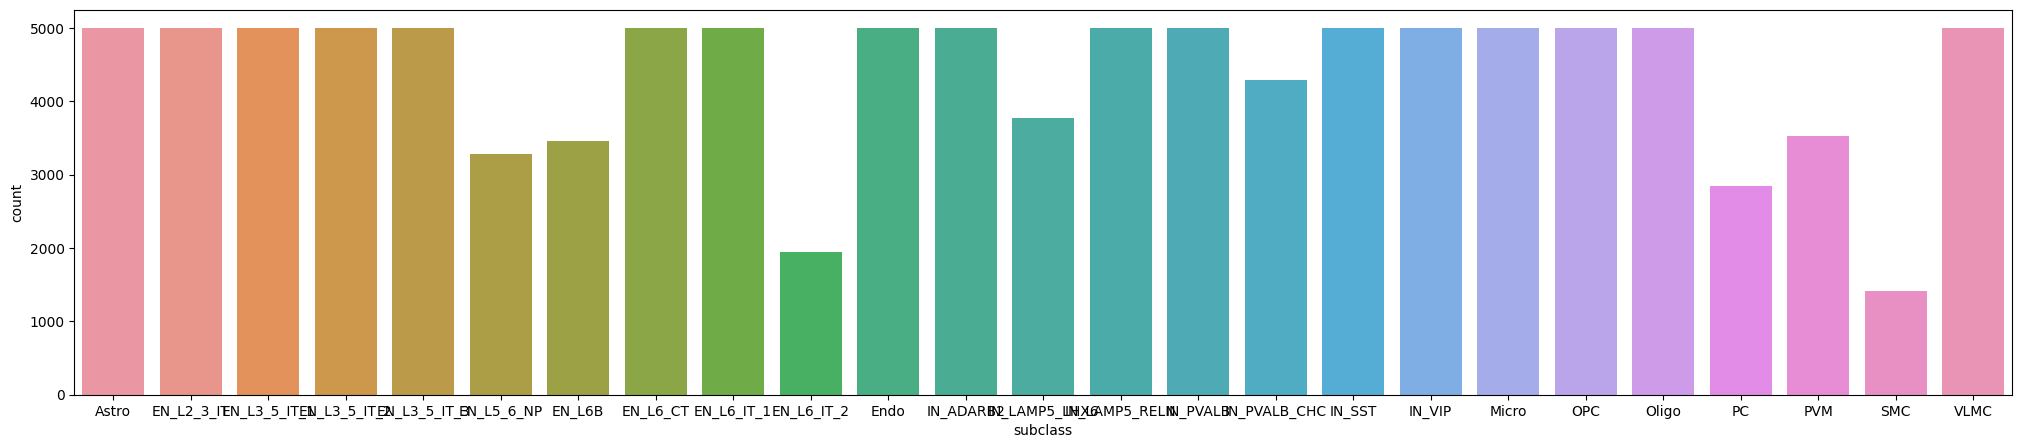

In [10]:
#barplot of cell types
plt.figure(figsize=(25, 5))
sns.barplot(x=adata_subsampled_randomly.obs['subclass'].value_counts().index, y=adata_subsampled_randomly.obs['subclass'].value_counts())

In [11]:
print(np.max(ad.X))
adata_subsampled_randomly.write_h5ad('/sc/arion/projects/CommonMind/collin/PsychAD/data/h5ad/reprocessed_2024/PsychAD_GRN_reprocessed_transformed_subsampled.h5ad')

10.0


In [12]:
RESULTS_FOLDERNAME='/sc/arion/projects/CommonMind/collin/PsychAD/no_var_pilot/UNIVERSAL_transformed_5k_subsample'
#Check if directory exists, if not create it
directory_path = os.path.join(RESULTS_FOLDERNAME)
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    os.makedirs(os.path.join(directory_path, 'csv'))
    os.makedirs(os.path.join(directory_path, 'h5ad'))
    os.makedirs(os.path.join(directory_path, 'regulons'))
    os.makedirs(os.path.join(directory_path, 'adj'))
    os.makedirs(os.path.join(directory_path, 'aucell'))

#save h5ad and csv
adata_subsampled_randomly.write_h5ad(os.path.join(directory_path, 'h5ad', 'PsychAD_GRN_reprocessed_transformed_subsampled.h5ad'))
adata_subsampled_randomly.to_df().to_csv(os.path.join(directory_path, 'csv', 'PsychAD_GRN_reprocessed_transformed_subsampled.csv'))


In [13]:
# create another ad object for the subsampled data with raw counts
ad = sc.read_h5ad('/sc/arion/projects/CommonMind/collin/PsychAD/data/h5ad/reprocessed_2024/PsychAD_GRN_reprocessed_raw.h5ad')
print(np.max(ad.X))
print(np.max(adata_subsampled_randomly.X))


2821.0
10.0


In [14]:
#filter for adata subsampled cells 
ad = ad[ad.obs.index.isin(adata_subsampled_randomly.obs.index)]

ad = ad[:, ad.var.index.isin(adata_subsampled_randomly.var.index)]

print(np.max(ad.X))
ad

1178.0


View of AnnData object with n_obs × n_vars = 109537 × 7081
    obs: 'SubID', 'Age', 'Brain_bank', 'Sex', 'c02x', 'c03x', 'c28x', 'c29x', 'c31x', 'c32x', 'c51x', 'c52x', 'c54x', 'c55x', 'r05x', 'r06x', 'r01x', 'r02x', 'r03x', 'r04x', 'r07x', 'r08x', 'r09x', 'm01x', 'm02x', 'm09x', 'm13x', 'm14x', 'm17x', 'm18x', 'm19x', 'm20x', 'm21x', 'Channel', 'rep', 'poolID', 'round_num', 'prep', 'SubID_cs', 'HTO_n_cs', 'max_prob', 'doublet_prob', 'Source', 'n_genes', 'n_counts', 'percent_mito', 'passed_SubID', 'scale', 'G1/S', 'G2/M', 'cycle_diff', 'cycling', 'predicted_phase', 'female_score', 'male_score', 'gender_score', 'predicted_gender', 'mito_genes', 'mito_ribo', 'ribo_genes', 'apoptosis', 'leiden_labels_res30', 'doublet_score', 'pred_dbl', 'class', 'subclass', 'subtype', 'Astro', 'EN_L2_3_IT', 'EN_L3_5_IT_1', 'EN_L3_5_IT_2', 'EN_L3_5_IT_3', 'EN_L5_6_NP', 'EN_L5_ET', 'EN_L6B', 'EN_L6_CT', 'EN_L6_IT_1', 'EN_L6_IT_2', 'Endo', 'IN_ADARB2', 'IN_LAMP5_LHX6', 'IN_LAMP5_RELN', 'IN_PVALB', 'IN_PVALB_

In [15]:
ad.write_h5ad('/sc/arion/projects/CommonMind/collin/PsychAD/data/h5ad/reprocessed_2024/PsychAD_GRN_reprocessed_raw_subsampled.h5ad')

In [16]:
RESULTS_FOLDERNAME='/sc/arion/projects/CommonMind/collin/PsychAD/no_var_pilot/UNIVERSAL_raw_5k_subsample'
#Check if directory exists, if not create it
directory_path = os.path.join(RESULTS_FOLDERNAME)
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    os.makedirs(os.path.join(directory_path, 'csv'))
    os.makedirs(os.path.join(directory_path, 'h5ad'))
    os.makedirs(os.path.join(directory_path, 'regulons'))
    os.makedirs(os.path.join(directory_path, 'adj'))
    os.makedirs(os.path.join(directory_path, 'aucell'))

#save h5ad and csv
ad.write_h5ad(os.path.join(directory_path, 'h5ad', 'PsychAD_GRN_reprocessed_raw_subsampled.h5ad'))
ad.to_df().to_csv(os.path.join(directory_path, 'csv', 'PsychAD_GRN_reprocessed_raw_subsampled.csv'))


In [18]:
ad

View of AnnData object with n_obs × n_vars = 109537 × 7081
    obs: 'SubID', 'Age', 'Brain_bank', 'Sex', 'c02x', 'c03x', 'c28x', 'c29x', 'c31x', 'c32x', 'c51x', 'c52x', 'c54x', 'c55x', 'r05x', 'r06x', 'r01x', 'r02x', 'r03x', 'r04x', 'r07x', 'r08x', 'r09x', 'm01x', 'm02x', 'm09x', 'm13x', 'm14x', 'm17x', 'm18x', 'm19x', 'm20x', 'm21x', 'Channel', 'rep', 'poolID', 'round_num', 'prep', 'SubID_cs', 'HTO_n_cs', 'max_prob', 'doublet_prob', 'Source', 'n_genes', 'n_counts', 'percent_mito', 'passed_SubID', 'scale', 'G1/S', 'G2/M', 'cycle_diff', 'cycling', 'predicted_phase', 'female_score', 'male_score', 'gender_score', 'predicted_gender', 'mito_genes', 'mito_ribo', 'ribo_genes', 'apoptosis', 'leiden_labels_res30', 'doublet_score', 'pred_dbl', 'class', 'subclass', 'subtype', 'Astro', 'EN_L2_3_IT', 'EN_L3_5_IT_1', 'EN_L3_5_IT_2', 'EN_L3_5_IT_3', 'EN_L5_6_NP', 'EN_L5_ET', 'EN_L6B', 'EN_L6_CT', 'EN_L6_IT_1', 'EN_L6_IT_2', 'Endo', 'IN_ADARB2', 'IN_LAMP5_LHX6', 'IN_LAMP5_RELN', 'IN_PVALB', 'IN_PVALB_

In [20]:
ad.obs['m01x'].value_counts()

m01x
AD         91169
Control    18368
Name: count, dtype: int64

In [69]:
print(np.max(ad.X))

1290.0


In [71]:
del ad

In [72]:
import datetime
import random
import multiprocessing
import os
import pandas as pd

RESULTS_FOLDERNAME='/sc/arion/projects/CommonMind/collin/PsychAD/no_var_pilot/UNIVERSAL_transformed_5k_subsample'
#RESULTS_FOLDERNAME='/sc/arion/projects/CommonMind/collin/PsychAD/no_var_pilot/UNIVERSAL'
tf_list = '/sc/arion/projects/roussp01a/collin/scenic-kaiyi/data/db_f/allTFs_hg38.txt'


CSV_FNAME = os.path.join(RESULTS_FOLDERNAME, 'csv')
if os.path.exists(CSV_FNAME):
    for n in [111, 222, 333, 444, 555]:
        # Get path of csv file for each contrast ~ celltype ~ variable combination
        SEED = n
        print('Inferring GRN for UNIVERSAL run {} with seed {}'.format(n, SEED))
        csv_file_path = [os.path.join(CSV_FNAME, filename) for filename in os.listdir(CSV_FNAME) if os.path.isfile(os.path.join(CSV_FNAME, filename))][0]
        print(csv_file_path)
        
        ADJACENCIES_FNAME = csv_file_path.replace('.csv', '.adjacencies_run{}_seed_{}.tsv'.format(n, SEED))
        ADJACENCIES_FNAME = ADJACENCIES_FNAME.replace('/csv/', '/adj/').replace('_PsychAD_GRN', '')
        
        if os.path.exists(ADJACENCIES_FNAME):
            print('Already exists: {}'.format(ADJACENCIES_FNAME))
            continue
        print(ADJACENCIES_FNAME)
        
        # Inferring GRN
        cores = multiprocessing.cpu_count() - 2

        start_time = datetime.datetime.now()
        print(f"Start time: {start_time.strftime('%Y-%m-%d %H:%M:%S')}")

        # System call to arboreto_with_multiprocessing.py
        os.system(f"arboreto_with_multiprocessing.py {csv_file_path} {tf_list} --method grnboost2 --output {ADJACENCIES_FNAME} --num_workers {cores} --seed {SEED}")

        end_time = datetime.datetime.now()
        print(f"End time: {end_time.strftime('%Y-%m-%d %H:%M:%S')}")

        duration = (end_time - start_time).total_seconds() / 60
        print('Total runtime: {} minutes'.format(duration))



Inferring GRN for UNIVERSAL run 111 with seed 111
/sc/arion/projects/CommonMind/collin/PsychAD/no_var_pilot/UNIVERSAL_transformed_5k_subsample/csv/PsychAD_GRN_reprocessed_transformed_subsampled.csv
/sc/arion/projects/CommonMind/collin/PsychAD/no_var_pilot/UNIVERSAL_transformed_5k_subsample/adj/PsychAD_GRN_reprocessed_transformed_subsampled.adjacencies_run111_seed_111.tsv
Start time: 2024-05-14 19:57:51


/sc/arion/projects/roussp01a/collin/envs/pyscenic/lib/python3.10/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/sc/arion/projects/roussp01a/collin/envs/pyscenic/lib/python3.10/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(

Loaded expression matrix of 124178 cells and 7081 genes in 169.79791045188904 seconds...
Loaded 1892 TFs...
starting grnboost2 using 46 processes...


Process ForkPoolWorker-41:
Process ForkPoolWorker-46:
Process ForkPoolWorker-43:
Process ForkPoolWorker-42:
Process ForkPoolWorker-44:
Process ForkPoolWorker-45:
Process ForkPoolWorker-39:
Process ForkPoolWorker-40:
Process ForkPoolWorker-38:
Process ForkPoolWorker-35:
Process ForkPoolWorker-37:
Process ForkPoolWorker-36:
Process ForkPoolWorker-29:
Process ForkPoolWorker-34:
Process ForkPoolWorker-17:
Process ForkPoolWorker-24:
Process ForkPoolWorker-20:
Process ForkPoolWorker-9:
Process ForkPoolWorker-19:
Process ForkPoolWorker-26:
Process ForkPoolWorker-28:
Process ForkPoolWorker-32:
Process ForkPoolWorker-4:
Process ForkPoolWorker-5:
Process ForkPoolWorker-33:
Process ForkPoolWorker-12:
Process ForkPoolWorker-18:
Process ForkPoolWorker-22:
Process ForkPoolWorker-23:
Process ForkPoolWorker-15:
Process ForkPoolWorker-16:
Process ForkPoolWorker-8:
Process ForkPoolWorker-31:
Process ForkPoolWorker-27:
Process ForkPoolWorker-3:
Process ForkPoolWorker-2:
Process ForkPoolWorker-10:
Process

End time: 2024-05-14 20:02:29
Total runtime: 4.62831335 minutes
Inferring GRN for UNIVERSAL run 222 with seed 222
/sc/arion/projects/CommonMind/collin/PsychAD/no_var_pilot/UNIVERSAL_transformed_5k_subsample/csv/PsychAD_GRN_reprocessed_transformed_subsampled.csv
/sc/arion/projects/CommonMind/collin/PsychAD/no_var_pilot/UNIVERSAL_transformed_5k_subsample/adj/PsychAD_GRN_reprocessed_transformed_subsampled.adjacencies_run222_seed_222.tsv
Start time: 2024-05-14 20:02:29


: 

: 

: 

: 

: 